Ejemplos de visualizaciones

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sns.set(style="darkgrid")

In [2]:
datos_prueba_barra = pd.DataFrame(
    {'group' : list(map(chr, range(65, 85))),
    'values':np.random.uniform(size=20) }
)
datos_prueba_barra.sort_values(by='values', inplace=True)
rango_barras = range(1, len(datos_prueba_barra.index) + 1)

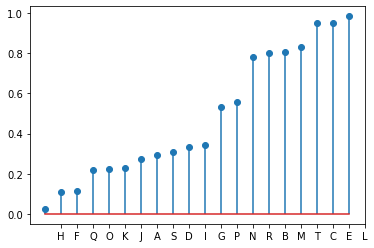

In [3]:
plt.stem(datos_prueba_barra['values'])
plt.xticks(rango_barras, datos_prueba_barra["group"])
plt.show()

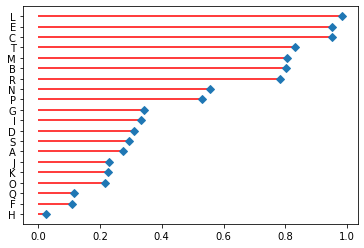

In [11]:
plt.hlines(y=rango_barras, xmin=0, xmax=datos_prueba_barra["values"], color='red')
plt.plot(datos_prueba_barra['values'], rango_barras, 'D')
plt.yticks(rango_barras, datos_prueba_barra['group'])
plt.show()

In [12]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

Aqui creamos la figura con una proporcion 14"x14". Luego vamos agregando los elementos a la grafica.

In [13]:
total = tips.groupby('day')['total_bill'].sum().reset_index()
total

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


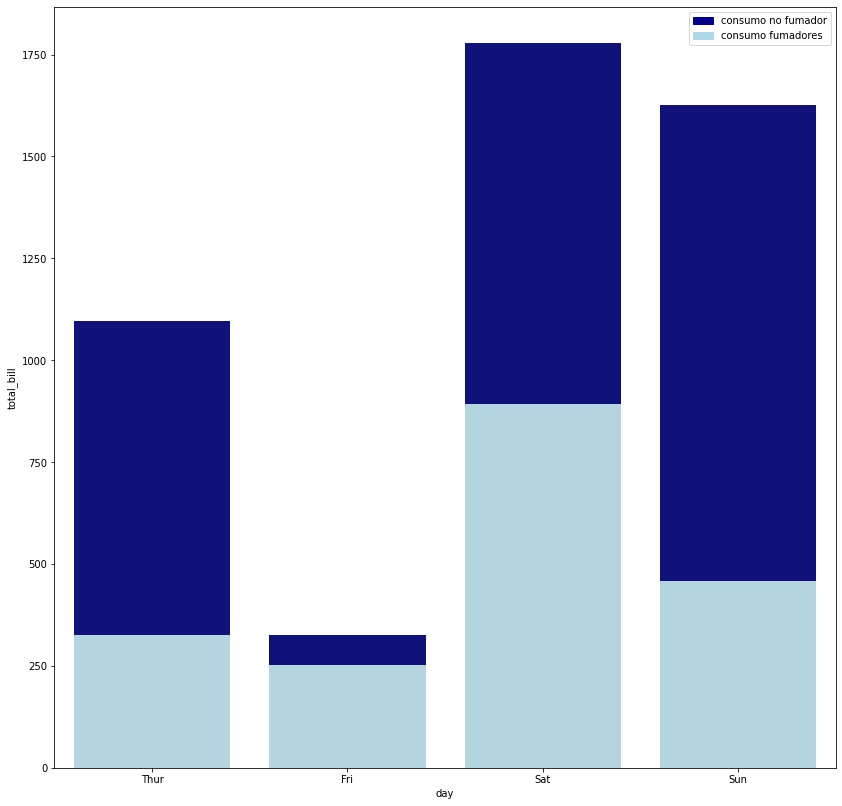

In [17]:
plt.figure(figsize=(14, 14))
bar1 = sns.barplot(x='day', y='total_bill', data=total, color='darkblue')
smoker = tips[tips.smoker=="Yes"]
bar2 = sns.barplot(x='day', y='total_bill', estimator=sum, ci=None, data=smoker, color='lightblue')

top_bar = mpatches.Patch(color='darkblue', label="consumo no fumador")
bottom_bar = mpatches.Patch(color='lightblue', label="consumo fumadores")
plt.legend(handles=[top_bar, bottom_bar])

plt.show()

In [20]:
print(tuple(
    zip(range(1,10),
        list("abcdefghij"))
))

((1, 'a'), (2, 'b'), (3, 'c'), (4, 'd'), (5, 'e'), (6, 'f'), (7, 'g'), (8, 'h'), (9, 'i'))


Ahora haremos una grafica apilada pero de distribución de genero (M/F)

In [21]:
total = tips.groupby('day')['total_bill'].sum().reset_index()
bill_fem = tips[tips.sex=="Female"].groupby('day')['total_bill'].sum().reset_index()

bill_fem['total_bill'] = [ i / j * 100 for i,j in zip(bill_fem.total_bill, total.total_bill)]
total['total_bill'] = [ i / j * 100 for i,j in zip(total.total_bill, total.total_bill)]

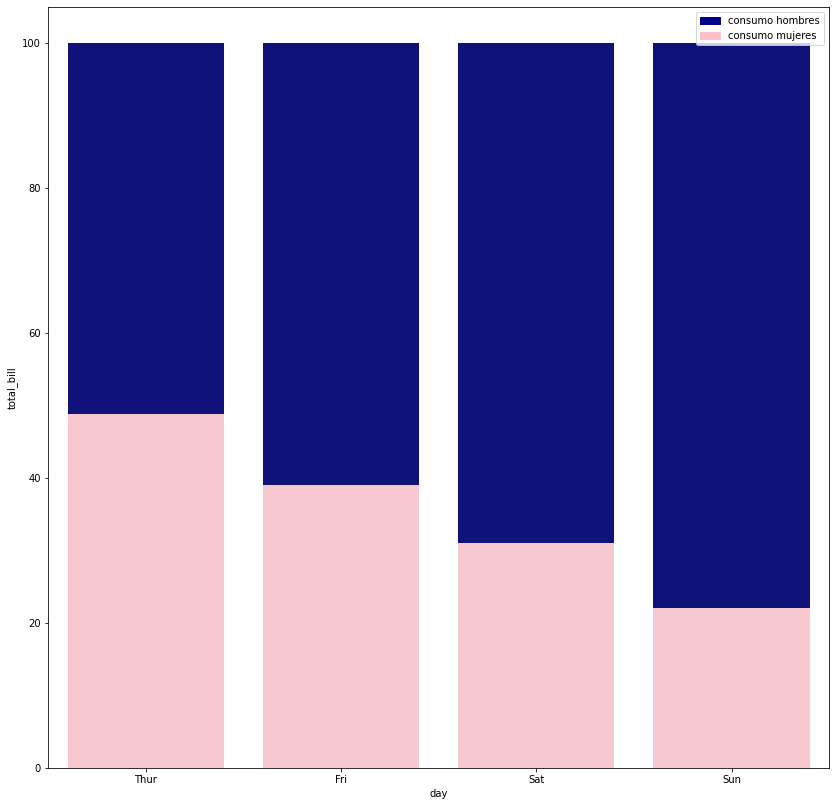

In [22]:

plt.figure(figsize=(14, 14))
bar1 = sns.barplot(x="day", y="total_bill", data=total, color='darkblue')
bar2 = sns.barplot(x="day", y='total_bill', data=bill_fem, color='pink')

top_bar = mpatches.Patch(color='darkblue', label="consumo hombres")
bottom_bar = mpatches.Patch(color='pink', label="consumo mujeres")
plt.legend(handles=[top_bar, bottom_bar])

plt.show()

<AxesSubplot:xlabel='tip', ylabel='day'>

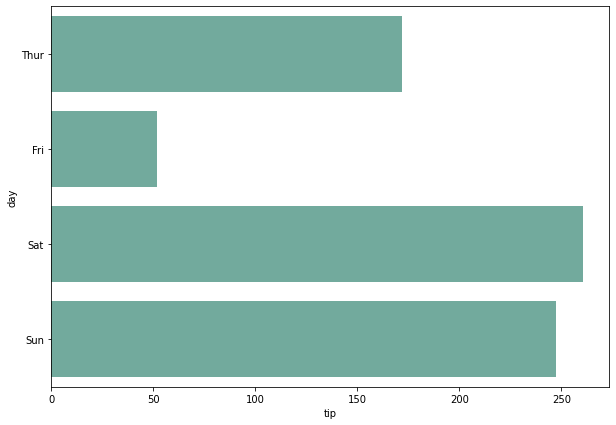

In [26]:
plt.figure(figsize=(10,7))
sns.barplot(
    x='tip',
    y='day',
    data=tips,
    estimator=sum,
    ci=None,
    color="#69b3a2"
)

<AxesSubplot:xlabel='day', ylabel='tip'>

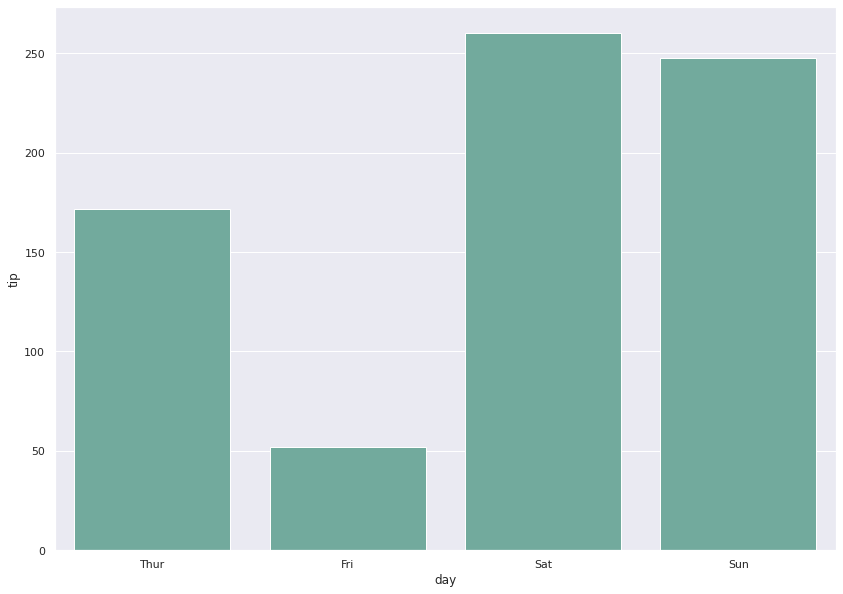

In [29]:
plt.figure(figsize=(14,10))
sns.barplot(
    x='day',
    y='tip',
    data=tips,
    estimator=sum,
    ci=None,
    color="#69b3a2"
)

<AxesSubplot:xlabel='day', ylabel='tip'>

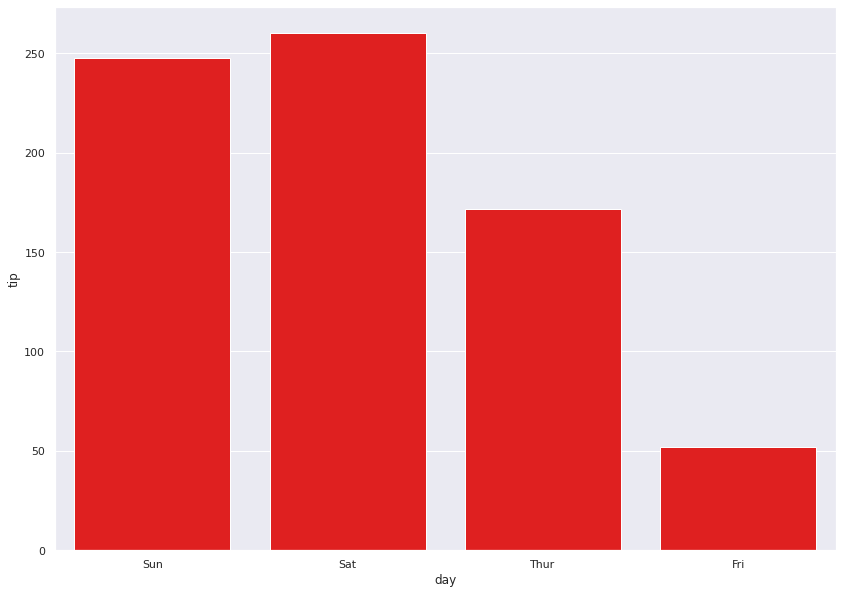

In [33]:
plt.figure(figsize=(14,10))
sns.barplot(
    x='day',
    y='tip',
    data=tips,
    estimator=sum,
    ci=None,
    order=['Sun', 'Sat', 'Thur', "Fri"],
    color="red"
)

<AxesSubplot:xlabel='day', ylabel='tip'>

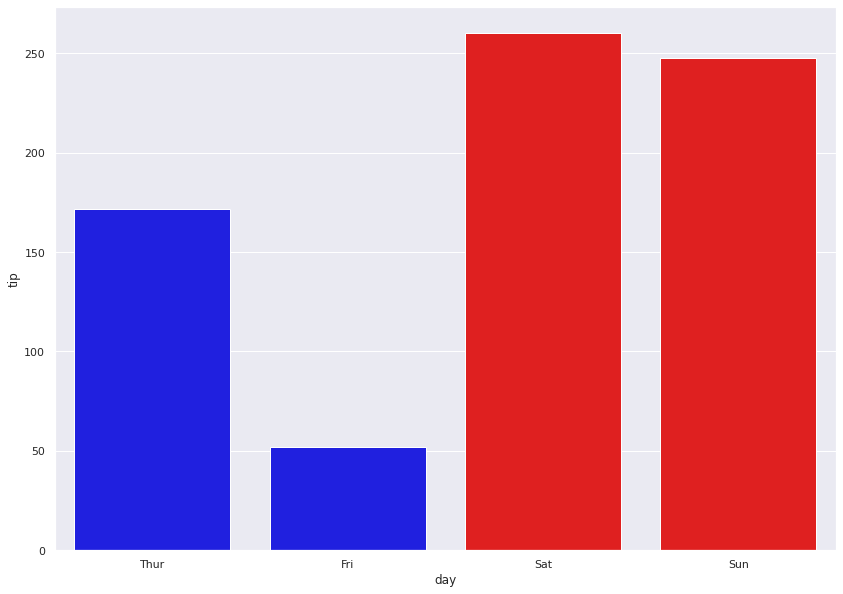

In [41]:
plt.figure(figsize=(14,10))
weekend = tips.loc[(tips.day=='Sun') | (tips.day=='Sat')]
weekday = tips.loc[(tips.day=='Thur') | (tips.day=='Fri')]
sns.barplot(
    x='day',
    y='tip',
    data=weekend,
    estimator=sum,
    ci=None,
    color="red"
)
sns.barplot(
    x='day',
    y='tip',
    data=weekday,
    estimator=sum,
    ci=None,
    color="blue"
)

https://www.programmersought.com/article/79413857070/

https://www.python-graph-gallery.com/405-dendrogram-with-heatmap-and-coloured-leaves

https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.diff.html